# Higher Education Student Performance Case Study

## Research Question: What factors most significantly impact the academic performance of higher education students?
Hypothesis: Just looking at the dataset beforehand, we hypothesize that, study hours and attendance, will be key predictors of academic performance. We also expect that demographic factors, such as age and gender, will have some influence on grades.
### Sub-questions:
- 1. How does study time affect academic performance?
- 2. Does attendance correlate with higher performance?
- 3. Are there demographic factors (such as age or family background) that influence student success?

# Attributes (Taken from Kaggle)
- 0 - Student ID
- 1 - Student Age (1: 18-21, 2: 22-25, 3: above 26)
- 2 - Sex (1: female, 2: male)
- 3 - Graduated high-school type: (1: private, 2: state, 3: other)
- 4 - Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
- 5 - Additional work: (1: Yes, 2: No)
- 6 - Regular artistic or sports activity: (1: Yes, 2: No)
- 7 - Do you have a partner: (1: Yes, 2: No)
- 8 - Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
- 9 - Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
- 10 - Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
- 11 - Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
- 12 - Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
- 13 - Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
- 14 - Parental status: (1: married, 2: divorced, 3: died - one of them or both) ***Listed as "Kids"…woops
- 15 - Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
- 16 - Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
- 17 - Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
- 18 - Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
- 19 - Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
- 20 - Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
- 21 - Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
- 22 - Attendance to classes (1: always, 2: sometimes, 3: never)
- 23 - Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
- 24 - Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
- 25 - Taking notes in classes: (1: never, 2: sometimes, 3: always)
- 26 - Listening in classes: (1: never, 2: sometimes, 3: always)
- 27 - Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
- 28 - Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
- 29 - Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
- 30 - Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
- 31 - Course ID
- 32 - OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 2: Load Dataset
original_data = pd.read_csv("student_prediction.csv")  

In [3]:
# Step 3: Create a Copy for Modeling
data = original_data.copy()  # Keep the original for visualization

In [4]:
original_data

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [5]:
# Step 4: Data Preprocessing (on the original dataset for visualization purposes)
# Check data types, null values, duplicates
print(original_data.info())
print(original_data.isnull().sum())  # Checking for null values
print(original_data.duplicated().sum())  # Checking for duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [6]:
original_data.shape, original_data.size

((145, 33), 4785)

In [7]:
original_data.columns, original_data.dtypes

(Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
        'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
        'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
        'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
        'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
        'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
        'GRADE'],
       dtype='object'),
 STUDENTID        object
 AGE               int64
 GENDER            int64
 HS_TYPE           int64
 SCHOLARSHIP       int64
 WORK              int64
 ACTIVITY          int64
 PARTNER           int64
 SALARY            int64
 TRANSPORT         int64
 LIVING            int64
 MOTHER_EDU        int64
 FATHER_EDU        int64
 #_SIBLINGS        int64
 KIDS              int64
 MOTHER_JOB        int64
 FATHER_JOB        int64
 STUDY_HRS         int64
 READ_FREQ         int64
 READ_FREQ_SCI     int64
 ATTEND_DEPT       in

In [8]:
# Step 5: Encode Categorical Variables
# Encoding categorical variables in the copy for modeling
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [9]:
# Step 6: Data Normalization (on the copy for modeling)
# Apply scaling to the numeric columns only in the copied dataset for modeling
scaler = StandardScaler()
numeric_cols = data.select_dtypes(include=np.number).columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [10]:
# Step 7: Exploratory Data Analysis (EDA) - Using Original Data for Visualizations

# Basic Descriptive Statistics
print(original_data.describe())

              AGE      GENDER     HS_TYPE  SCHOLARSHIP        WORK  \
count  145.000000  145.000000  145.000000   145.000000  145.000000   
mean     1.620690    1.600000    1.944828     3.572414    1.662069   
std      0.613154    0.491596    0.537216     0.805750    0.474644   
min      1.000000    1.000000    1.000000     1.000000    1.000000   
25%      1.000000    1.000000    2.000000     3.000000    1.000000   
50%      2.000000    2.000000    2.000000     3.000000    2.000000   
75%      2.000000    2.000000    2.000000     4.000000    2.000000   
max      3.000000    2.000000    3.000000     5.000000    2.000000   

         ACTIVITY     PARTNER      SALARY   TRANSPORT      LIVING  ...  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  ...   
mean     1.600000    1.579310    1.627586    1.620690    1.731034  ...   
std      0.491596    0.495381    1.020245    1.061112    0.783999  ...   
min      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

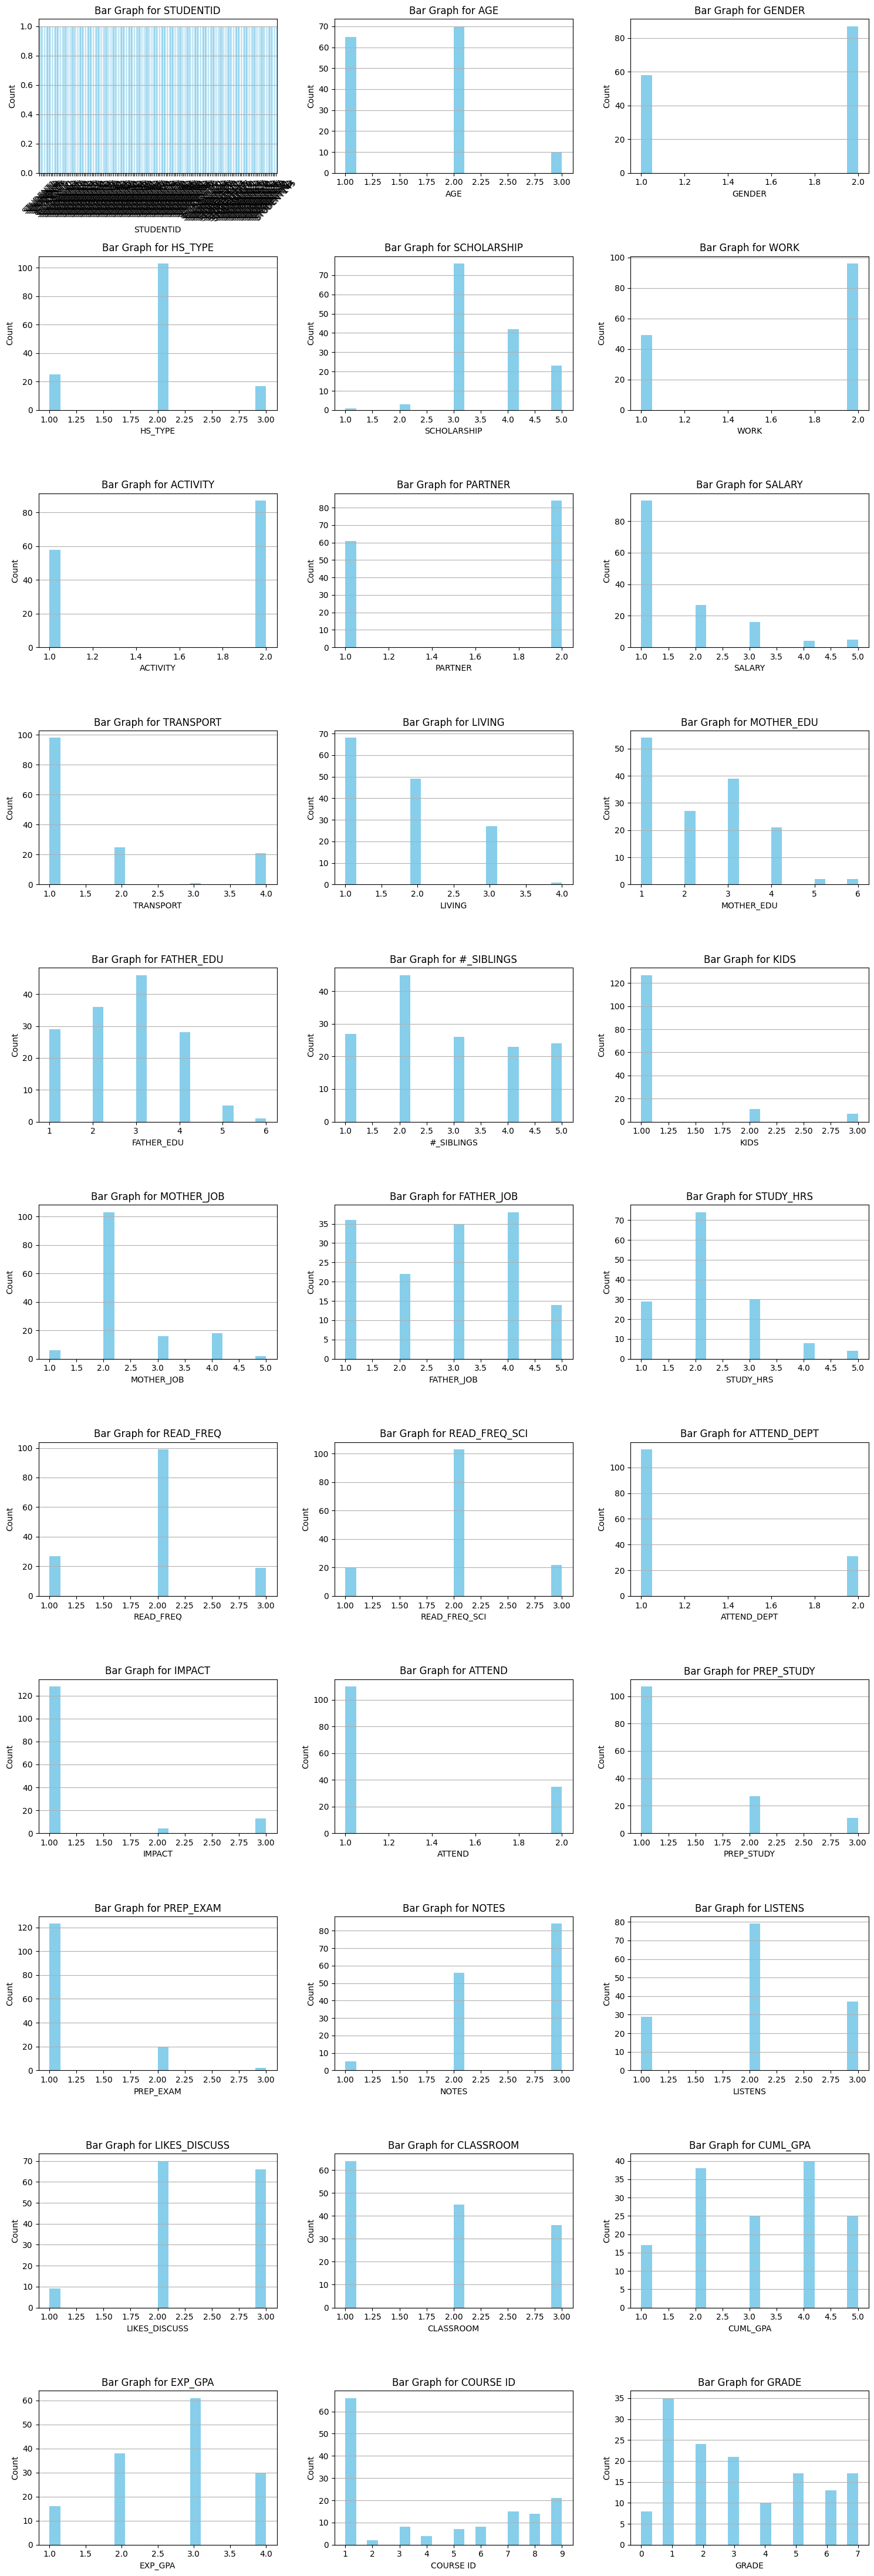

In [11]:
# Visualizations
# Histogram of Study Hours
# Loop through each feature in the DataFrame
# Set the number of rows and columns for subplots
num_columns = 3  # Adjust the number of columns in the grid
num_features = len(original_data.columns)
num_rows = (num_features + num_columns - 1) // num_columns  # Calculate rows needed

plt.figure(figsize=(15, num_rows * 4))  # Adjust the overall figure size

# Loop through each feature in the DataFrame and create subplots
for i, column in enumerate(original_data.columns):
    plt.subplot(num_rows, num_columns, i + 1)  # Create a subplot for each feature
    
    # Check if the column is categorical or numerical
    if original_data[column].dtype == 'object' or original_data[column].dtype.name == 'category':
        # For categorical data, use value_counts
        original_data[column].value_counts().plot(kind='bar', color='skyblue', ax=plt.gca())
    else:
        # For numerical data, plot a histogram
        original_data[column].plot(kind='hist', bins=20, color='skyblue', ax=plt.gca())
    
    # Set titles and labels
    plt.title(f'Bar Graph for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    
    # Rotate x-ticks for better readability if needed
    if original_data[column].dtype == 'object' or original_data[column].dtype.name == 'category':
        plt.xticks(rotation=45)

    plt.grid(axis='y')

plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()  # Display the combined plot

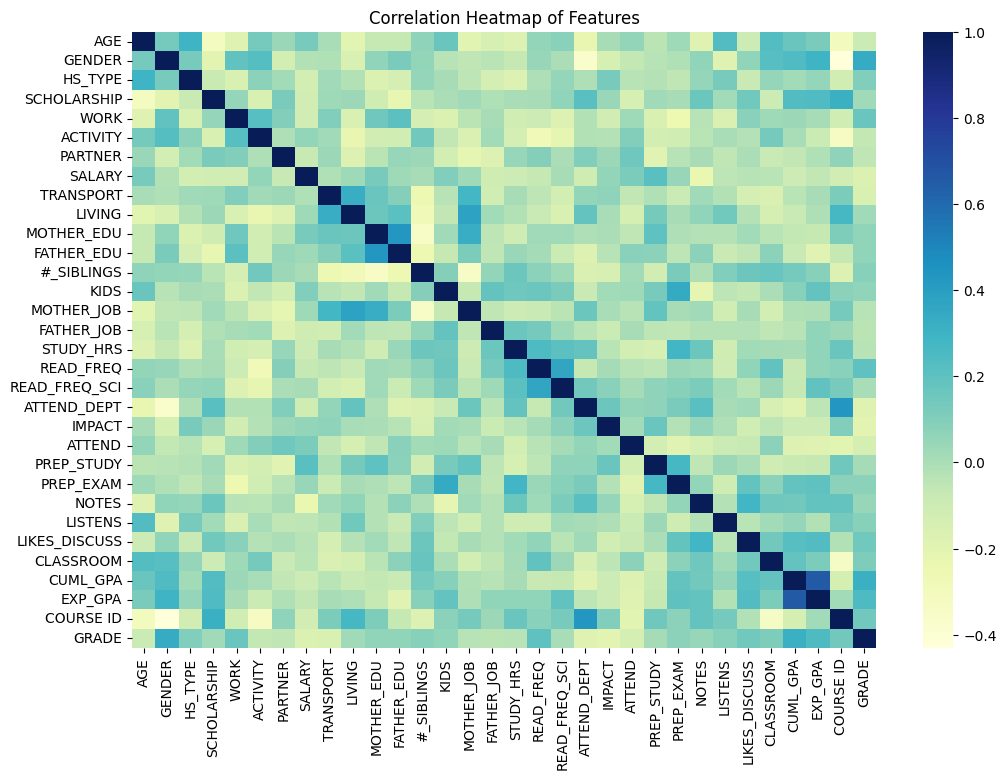

In [12]:
# Correlation Heatmap (Original Data for Visualization)
plt.figure(figsize=(12, 8))

# Select only numeric columns for the heatmap
numeric_data = original_data.select_dtypes(include=np.number)

sns.heatmap(numeric_data.corr(), annot=False, cmap="YlGnBu")  # No annotations for cleaner view
plt.title("Correlation Heatmap of Features")
plt.show()

### Observation for the Correlation Heatmap

The correlation heatmap reveals the following key insights:

1. **Strong Positive Correlations**: 
   - `GRADE` is strongly positively correlated with `CUM_GPA` and `EXP_GPA`, indicating that higher GPAs are associated with better grades.
   - Other features like `ATTEND`, `ATTEND_DEPT`, and `LIKES_DISCUSS` also show positive correlations with `GRADE`.

2. **Weak Correlations**: 
   - Features such as `#_SIBLINGS`, `MOTHER_JOB`, and `FATHER_JOB` exhibit little to no correlation with `GRADE`.

3. **Negative Correlations**: 
   - Some features, like `IMPACT`, show a slight negative correlation with `GRADE`, suggesting higher values may be associated with lower grades.

4. **Visual Insights**: 
   - Darker areas on the heatmap indicate stronger correlations, making it easy to identify relationships among features.

### Conclusion
The heatmap highlights key relationships, particularly the strong association between GPA and grades, while suggesting many other factors have minimal direct impact on academic performance. Further investigation into the positively correlated features could provide additional insights.|

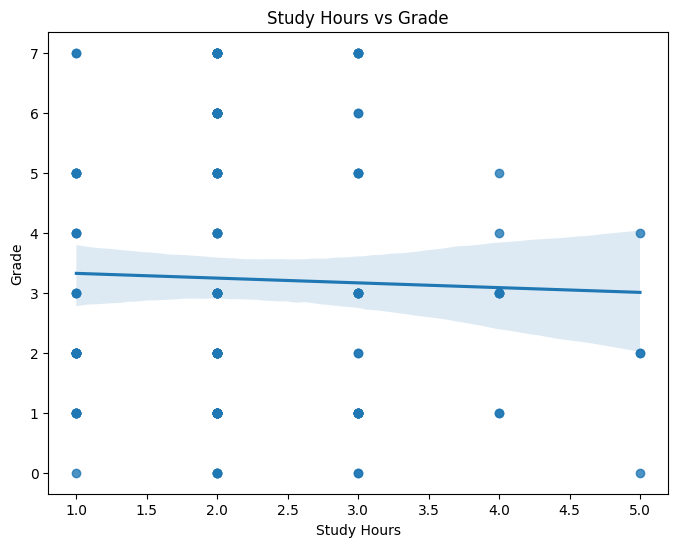

In [13]:
# How does study time affect performance?
plt.figure(figsize=(8, 6))
sns.regplot(x='STUDY_HRS', y='GRADE', data=original_data)
plt.title("Study Hours vs Grade")
plt.xlabel("Study Hours")
plt.ylabel("Grade")
plt.show()

### Observation for the Scatter Plot with Regression Line

The scatter plot illustrates the relationship between study hours (`STUDY_HRS`) and grades (`GRADE`) with the following key points:

1. **Weak Correlation**: The regression line shows a slight downward trend, indicating little to no strong correlation between study hours and grades.

2. **Data Spread**: Points are widely scattered, suggesting significant variability in grades across different study hours, with some students achieving high grades with minimal study time.

3. **Outliers**: There are outliers present, indicating that some students perform exceptionally well or poorly regardless of their study hours.

4. **Conclusion**: The results imply that factors other than study hours may significantly influence academic performance, warranting further investigation into those variables.

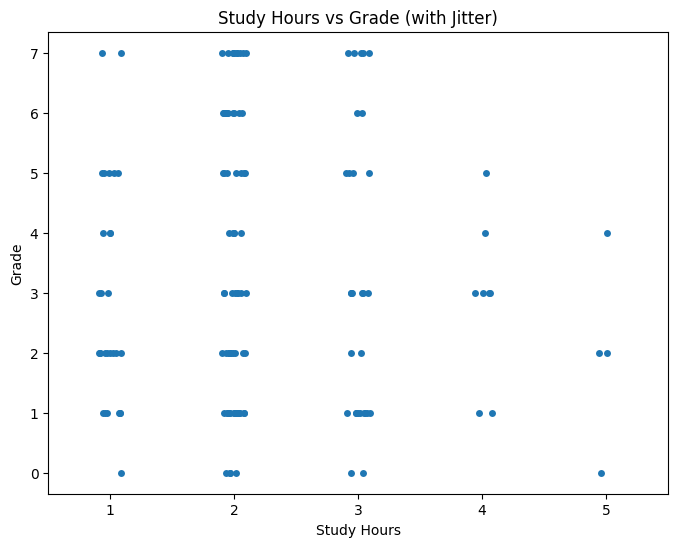

In [14]:
plt.figure(figsize=(8, 6))
sns.stripplot(x='STUDY_HRS', y='GRADE', data=original_data, jitter=True)
plt.title("Study Hours vs Grade (with Jitter)")
plt.xlabel("Study Hours")
plt.ylabel("Grade")
plt.show()

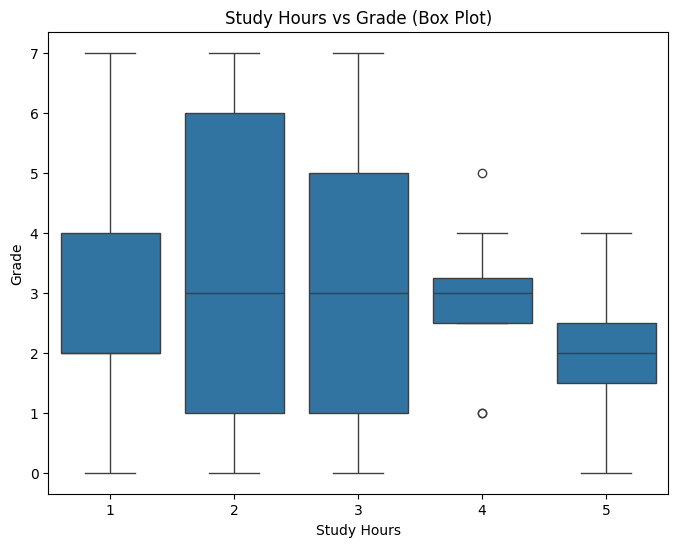

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='STUDY_HRS', y='GRADE', data=original_data)
plt.title("Study Hours vs Grade (Box Plot)")
plt.xlabel("Study Hours")
plt.ylabel("Grade")
plt.show()

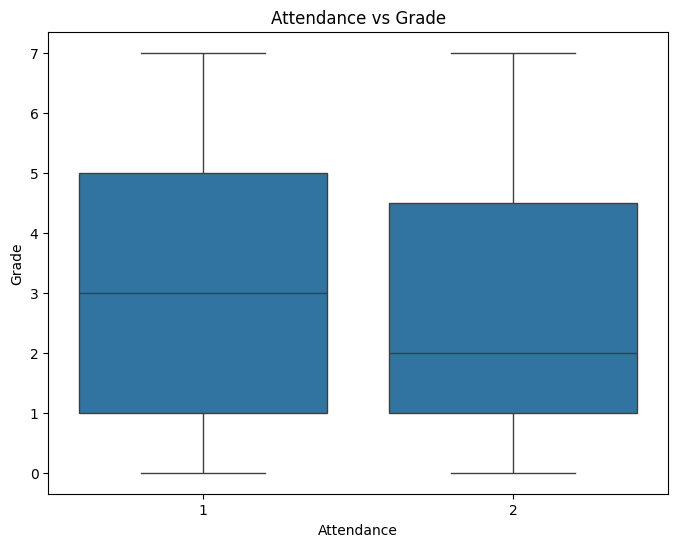

In [16]:
# Does attendance correlate with higher performance?
plt.figure(figsize=(8, 6))
sns.boxplot(x='ATTEND', y='GRADE', data=original_data)
plt.title("Attendance vs Grade")
plt.xlabel("Attendance")
plt.ylabel("Grade")
plt.show()

In [17]:
# Step 8: Model Preparation and Training - Using Normalized Data for Modeling
# Selecting the features and target variable
X = data.drop(['GRADE', 'STUDENTID', 'COURSE ID'], axis=1)
# Removing 'GRADE', 'STUDENTID', and 'COURSE ID' from the features:
# - 'GRADE' is the target variable we want to predict, so it should not be included in the features.
# - 'STUDENTID' is an identifier that does not contain predictive information for academic performance; 
#   including it could lead to overfitting or model bias.
# - The 'COURSE ID' may sometimes directly indicate the difficulty level of the classes, rendering this information less relevant.
y = data['GRADE']            

In [18]:
# Splitting the data (Trying out a 70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Model: Random Forest Regressor for Continuous Target
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation for Regression
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 0.8797904697847119
R^2 Score: 0.07414755213055324


In [20]:
# Step 9: Feature Importance from the Model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

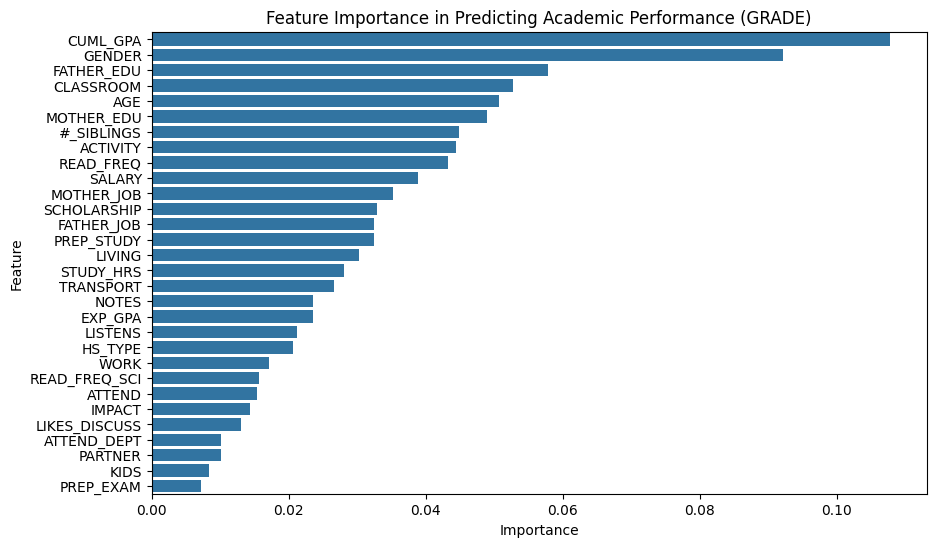

In [21]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance in Predicting Academic Performance (GRADE)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

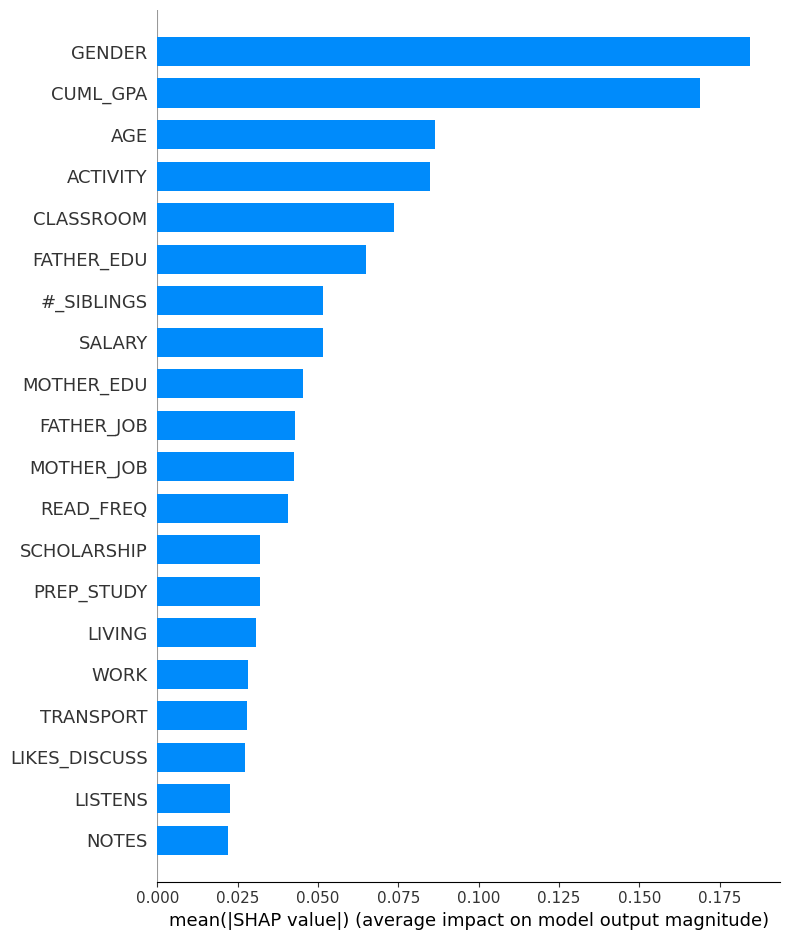

In [22]:
import shap

# Create the SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values for the training data
shap_values = explainer(X_train)

# Create a summary plot for feature importance
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train, plot_type="bar")

1. Why is CUML_GPA the most influential feature in predicting GRADE?
- CUML_GPA (Cumulative GPA) reflects a student's long-term academic performance, which is naturally highly correlated with GRADE. Since cumulative GPA aggregates past grades, it serves as a strong predictor of current performance, making it logical that it has the highest importance in predicting GRADE.

2. How does GENDER impact academic performance in this model?
- GENDER appears as the second most important feature in predicting GRADE. This suggests that there may be observable differences in performance based on gender. It's essential to investigate further to understand whether these differences are consistent across the dataset and to consider if gender-related factors, such as learning styles or social expectations, could be influencing academic outcomes.

3. What role do parental education levels (FATHER_EDU and MOTHER_EDU) play in predicting GRADE?
- Both FATHER_EDU and MOTHER_EDU rank high in importance, indicating that the educational background of a student’s parents significantly influences their academic performance. Higher parental education levels may correlate with increased academic support at home, greater emphasis on education, or access to resources that can enhance a student's performance. This finding suggests that family background is an important factor in academic success.

4. Why is CLASSROOM an important feature?
- CLASSROOM might represent specific classes, instructors, or class environments that impact student performance. For example, certain classrooms might have different teaching methods, resources, or peer environments that could affect grades. Further investigation into the attributes of different classrooms could provide insights into the impact of classroom dynamics on academic outcomes.


5. What does the influence of AGE suggest about academic performance?
- AGE appears relatively high in feature importance, which could indicate that older or younger students in the dataset have different academic experiences or maturity levels that influence their performance. This could be due to factors like time management, life experience, or responsibilities outside of school, which tend to vary with age.

6. Does STUDY_HRS (study hours) have a significant impact on GRADE?
- Interestingly, STUDY_HRS has relatively low importance compared to CUML_GPA, GENDER, and parental education levels. This might suggest that while study hours contribute to performance, other factors, such as cumulative academic habits (captured by CUML_GPA) or family background, play a more substantial role in overall academic success. It may also reflect the need to study more effectively rather than simply studying for more hours.

7. What insight does the relatively low importance of ATTEND (attendance) provide?
- The low importance of ATTEND suggests that attendance alone might not be a strong predictor of academic performance in this dataset. It may indicate that factors like study habits, family background, or cumulative performance have a more direct impact on grades. However, attendance could still be indirectly important if it influences understanding and engagement, which are captured in other performance indicators.

8. Why are variables like PREP_EXAM, KIDS, and PARTNER at the bottom of the feature importance list?
- Features such as PREP_EXAM (exam preparation), KIDS, and PARTNER (relationship status) show low importance, implying they have minimal direct influence on GRADE. KIDS and PARTNER might not be strongly correlated with academic outcomes, possibly because personal family dynamics or relationship status do not directly impact performance for most students in the dataset. Similarly, PREP_EXAM might be less relevant if students’ cumulative study habits and GPA already account for their preparation levels.

# Summary of Insights
- CUML_GPA is the strongest predictor of GRADE, indicating that students’ cumulative academic performance is closely linked to their current grades.
- Gender and Parental Education play significant roles, suggesting that demographic and familial factors are influential in shaping academic outcomes.
- Classroom Environment and Age also impact performance, which could reflect differences in learning environments and developmental stages.
- Study Hours and Attendance are less influential than expected, suggesting that factors beyond simple study time and presence in class contribute more heavily to academic success.